Scope:
1) get a single image + labels

2) create a basic regressio network

3) train till overfit

4) add data generator

5) clean code

6) add callbacks

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import k3d
from IPython.display import Image

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model

from utilis.resize_label import *
from utilis.callbacks import *
from models.unet import *
from models.encoders.vgg_encoder import *

# Get data and labels

In [4]:
# !ls /data/cornucopia/ib255/derivative_datasets/cued_scene_coordinate_regression/data_from_jason/DS_003_JDB-Full/coordinates/

In [2]:
coord_data_dir = "/data/cornucopia/ib255/derivative_datasets/cued_scene_coordinate_regression/data_from_jason/DS_003_JDB-Full/coordinates/"

In [3]:
data_size = 3
images = np.zeros((data_size, 2048, 4096, 3))
labels = np.zeros((data_size, 2048, 4096, 3))


for data in range(1,data_size + 1):
    if data < 10:
        data = "00" + str(data)
    elif data < 100:
        data = "0" + str(data)

    coord_npz = "0{}_rendered.png_config.npz".format(str(data))
    npz_data = np.load(coord_data_dir + coord_npz)
    
    images[int(data)-1,:,:,:] = npz_data['image_colors'].astype(int)
    labels[int(data)-1,:,:,:] = npz_data['points_3d_camera'] 

In [6]:
# plot = k3d.plot(name='points')
# plt_points = k3d.points(positions=label[::5], point_size=0.2)
# plot += plt_points
# plt_points.shader='3d'
# plot.display()

# Let's downsample image and label to 224x224 size

In [7]:
images_low = np.zeros((data_size, 224, 224, 3))
labels_low = np.zeros((data_size, 224, 224, 3))

for ind in range(data_size):
    images_low[ind,:,:,:] = cv2.resize(images[ind,:,:,:],(224, 224), interpolation = cv2.INTER_CUBIC)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


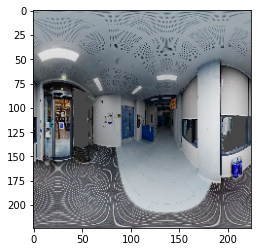

In [8]:
plt.imshow(images_low[0].astype(int))

In [9]:
for ind in range(data_size):
    labels_low[ind,:,:,:] = resize_coordinates(labels[ind,:,:,:], new_dim=(224,224))

In [9]:
plot = k3d.plot(name='points')
plt_points = k3d.points(positions=label_res, point_size=0.2)
plot += plt_points
plt_points.shader='3d'
plot.display()

/home/mlmi-2020/jz522/localisation_from_image_project/envs/loc/lib/python3.7/site-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  np.dtype(self.dtype).name))


Output()

# Write a simple model

In [10]:
def vgg_unet(input_height=224, input_width=224):

    model = unet(vgg_encoder, input_height=input_height, input_width=input_width)
    model.model_name = "vgg_unet"
    
    return model

In [11]:
unet_model = vgg_unet()
unet_model.compile(loss='mse', optimizer=keras.optimizers.Adam(0.0001),
        metrics=[keras.metrics.MeanAbsoluteError()])

In [12]:
# train_x = np.expand_dims(images_low[0,:,:,:], axis=0)
# print(train_x.shape)
# train_y = np.expand_dims(labels_low[0,:,:,:], axis=0)
# print(train_x.shape)

In [37]:
visualise_training = Visualise_learning(images_low[0], labels_low[0])

Epoch 1/1000
1/1 [==============================] - 1s 555ms/step - loss: 0.0371 - mean_absolute_error: 0.1244
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0367 - mean_absolute_error: 0.1233
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0365 - mean_absolute_error: 0.1231
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0361 - mean_absolute_error: 0.1217
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0357 - mean_absolute_error: 0.1212
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0353 - mean_absolute_error: 0.1205
Epoch 7/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0349 - mean_absolute_error: 0.1193
Epoch 8/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0347 - mean_absolute_error: 0.1192
Epoch 9/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0343 - mean_absolute_error: 0.1182
Epoch 10/1000
1/1

1/1 [==============================] - 0s 2ms/step - loss: 0.0223 - mean_absolute_error: 0.0899
Epoch 76/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0223 - mean_absolute_error: 0.0898
Epoch 77/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0222 - mean_absolute_error: 0.0896
Epoch 78/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0221 - mean_absolute_error: 0.0895
Epoch 79/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0220 - mean_absolute_error: 0.0893
Epoch 80/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0220 - mean_absolute_error: 0.0897
Epoch 81/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0218 - mean_absolute_error: 0.0888
Epoch 82/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0217 - mean_absolute_error: 0.0886
Epoch 83/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0215 - mean_absolute_error: 0.0880
Epoch 84/1000
1/1 [=====

1/1 [==============================] - 0s 1ms/step - loss: 0.0168 - mean_absolute_error: 0.0762
Epoch 150/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0167 - mean_absolute_error: 0.0759
Epoch 151/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0167 - mean_absolute_error: 0.0759
Epoch 152/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0165 - mean_absolute_error: 0.0751
Epoch 153/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0165 - mean_absolute_error: 0.0751
Epoch 154/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0165 - mean_absolute_error: 0.0753
Epoch 155/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0164 - mean_absolute_error: 0.0748
Epoch 156/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0163 - mean_absolute_error: 0.0748
Epoch 157/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0163 - mean_absolute_error: 0.0747
Epoch 158/1000
1

1/1 [==============================] - 0s 1ms/step - loss: 0.0135 - mean_absolute_error: 0.0668
Epoch 223/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0134 - mean_absolute_error: 0.0667
Epoch 224/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0134 - mean_absolute_error: 0.0666
Epoch 225/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0134 - mean_absolute_error: 0.0666
Epoch 226/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0134 - mean_absolute_error: 0.0666
Epoch 227/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0133 - mean_absolute_error: 0.0666
Epoch 228/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0133 - mean_absolute_error: 0.0666
Epoch 229/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0133 - mean_absolute_error: 0.0666
Epoch 230/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0133 - mean_absolute_error: 0.0666
Epoch 231/1000
1

1/1 [==============================] - 0s 2ms/step - loss: 0.0116 - mean_absolute_error: 0.0619
Epoch 296/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0119 - mean_absolute_error: 0.0634
Epoch 297/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0125 - mean_absolute_error: 0.0657
Epoch 298/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0131 - mean_absolute_error: 0.0683
Epoch 299/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0133 - mean_absolute_error: 0.0691
Epoch 300/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0125 - mean_absolute_error: 0.0662
Epoch 301/1000
1/1 [==============================] - 1s 558ms/step - loss: 0.0122 - mean_absolute_error: 0.0649
Epoch 302/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0130 - mean_absolute_error: 0.0698
Epoch 303/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0132 - mean_absolute_error: 0.0707
Epoch 304/1000

1/1 [==============================] - 0s 1ms/step - loss: 0.0101 - mean_absolute_error: 0.0575
Epoch 369/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0102 - mean_absolute_error: 0.0579
Epoch 370/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0103 - mean_absolute_error: 0.0585
Epoch 371/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0104 - mean_absolute_error: 0.0590
Epoch 372/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0105 - mean_absolute_error: 0.0593
Epoch 373/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0104 - mean_absolute_error: 0.0592
Epoch 374/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0104 - mean_absolute_error: 0.0590
Epoch 375/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0105 - mean_absolute_error: 0.0591
Epoch 376/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0103 - mean_absolute_error: 0.0589
Epoch 377/1000
1

1/1 [==============================] - 0s 1ms/step - loss: 0.0088 - mean_absolute_error: 0.0525
Epoch 442/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0088 - mean_absolute_error: 0.0524
Epoch 443/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0088 - mean_absolute_error: 0.0525
Epoch 444/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0087 - mean_absolute_error: 0.0521
Epoch 445/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0087 - mean_absolute_error: 0.0521
Epoch 446/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0087 - mean_absolute_error: 0.0520
Epoch 447/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0086 - mean_absolute_error: 0.0518
Epoch 448/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0086 - mean_absolute_error: 0.0518
Epoch 449/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0086 - mean_absolute_error: 0.0516
Epoch 450/1000
1

1/1 [==============================] - 0s 1ms/step - loss: 0.0078 - mean_absolute_error: 0.0489
Epoch 515/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0078 - mean_absolute_error: 0.0488
Epoch 516/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0078 - mean_absolute_error: 0.0489
Epoch 517/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0078 - mean_absolute_error: 0.0489
Epoch 518/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0078 - mean_absolute_error: 0.0491
Epoch 519/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0078 - mean_absolute_error: 0.0495
Epoch 520/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0079 - mean_absolute_error: 0.0500
Epoch 521/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0080 - mean_absolute_error: 0.0504
Epoch 522/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0080 - mean_absolute_error: 0.0509
Epoch 523/1000
1

1/1 [==============================] - 0s 1ms/step - loss: 0.0077 - mean_absolute_error: 0.0502
Epoch 588/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0080 - mean_absolute_error: 0.0517
Epoch 589/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0082 - mean_absolute_error: 0.0534
Epoch 590/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0084 - mean_absolute_error: 0.0541
Epoch 591/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0082 - mean_absolute_error: 0.0536
Epoch 592/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0080 - mean_absolute_error: 0.0527
Epoch 593/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0082 - mean_absolute_error: 0.0540
Epoch 594/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0084 - mean_absolute_error: 0.0556
Epoch 595/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0082 - mean_absolute_error: 0.0547
Epoch 596/1000
1

1/1 [==============================] - 0s 1ms/step - loss: 0.0064 - mean_absolute_error: 0.0439
Epoch 661/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0064 - mean_absolute_error: 0.0439
Epoch 662/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0064 - mean_absolute_error: 0.0439
Epoch 663/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0064 - mean_absolute_error: 0.0439
Epoch 664/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0064 - mean_absolute_error: 0.0440
Epoch 665/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0064 - mean_absolute_error: 0.0441
Epoch 666/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0064 - mean_absolute_error: 0.0443
Epoch 667/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0064 - mean_absolute_error: 0.0446
Epoch 668/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0065 - mean_absolute_error: 0.0449
Epoch 669/1000
1

1/1 [==============================] - 0s 1ms/step - loss: 0.0062 - mean_absolute_error: 0.0449
Epoch 734/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0062 - mean_absolute_error: 0.0452
Epoch 735/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0062 - mean_absolute_error: 0.0449
Epoch 736/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0061 - mean_absolute_error: 0.0441
Epoch 737/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0061 - mean_absolute_error: 0.0437
Epoch 738/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0060 - mean_absolute_error: 0.0435
Epoch 739/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0060 - mean_absolute_error: 0.0432
Epoch 740/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0060 - mean_absolute_error: 0.0430
Epoch 741/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0059 - mean_absolute_error: 0.0428
Epoch 742/1000
1

1/1 [==============================] - 0s 1ms/step - loss: 0.0057 - mean_absolute_error: 0.0423
Epoch 807/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0057 - mean_absolute_error: 0.0421
Epoch 808/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0057 - mean_absolute_error: 0.0420
Epoch 809/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0056 - mean_absolute_error: 0.0416
Epoch 810/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0056 - mean_absolute_error: 0.0417
Epoch 811/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0056 - mean_absolute_error: 0.0414
Epoch 812/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0056 - mean_absolute_error: 0.0414
Epoch 813/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0055 - mean_absolute_error: 0.0412
Epoch 814/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0055 - mean_absolute_error: 0.0411
Epoch 815/1000
1

1/1 [==============================] - 0s 1ms/step - loss: 0.0050 - mean_absolute_error: 0.0391
Epoch 880/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0050 - mean_absolute_error: 0.0391
Epoch 881/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0050 - mean_absolute_error: 0.0391
Epoch 882/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0050 - mean_absolute_error: 0.0390
Epoch 883/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0050 - mean_absolute_error: 0.0389
Epoch 884/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0050 - mean_absolute_error: 0.0389
Epoch 885/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0050 - mean_absolute_error: 0.0389
Epoch 886/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0050 - mean_absolute_error: 0.0388
Epoch 887/1000
1/1 [==============================] - 0s 951us/step - loss: 0.0050 - mean_absolute_error: 0.0387
Epoch 888/1000

1/1 [==============================] - 0s 1ms/step - loss: 0.0047 - mean_absolute_error: 0.0377
Epoch 953/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0047 - mean_absolute_error: 0.0377
Epoch 954/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0047 - mean_absolute_error: 0.0377
Epoch 955/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046 - mean_absolute_error: 0.0376
Epoch 956/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046 - mean_absolute_error: 0.0375
Epoch 957/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046 - mean_absolute_error: 0.0374
Epoch 958/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046 - mean_absolute_error: 0.0374
Epoch 959/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046 - mean_absolute_error: 0.0373
Epoch 960/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046 - mean_absolute_error: 0.0373
Epoch 961/1000
1

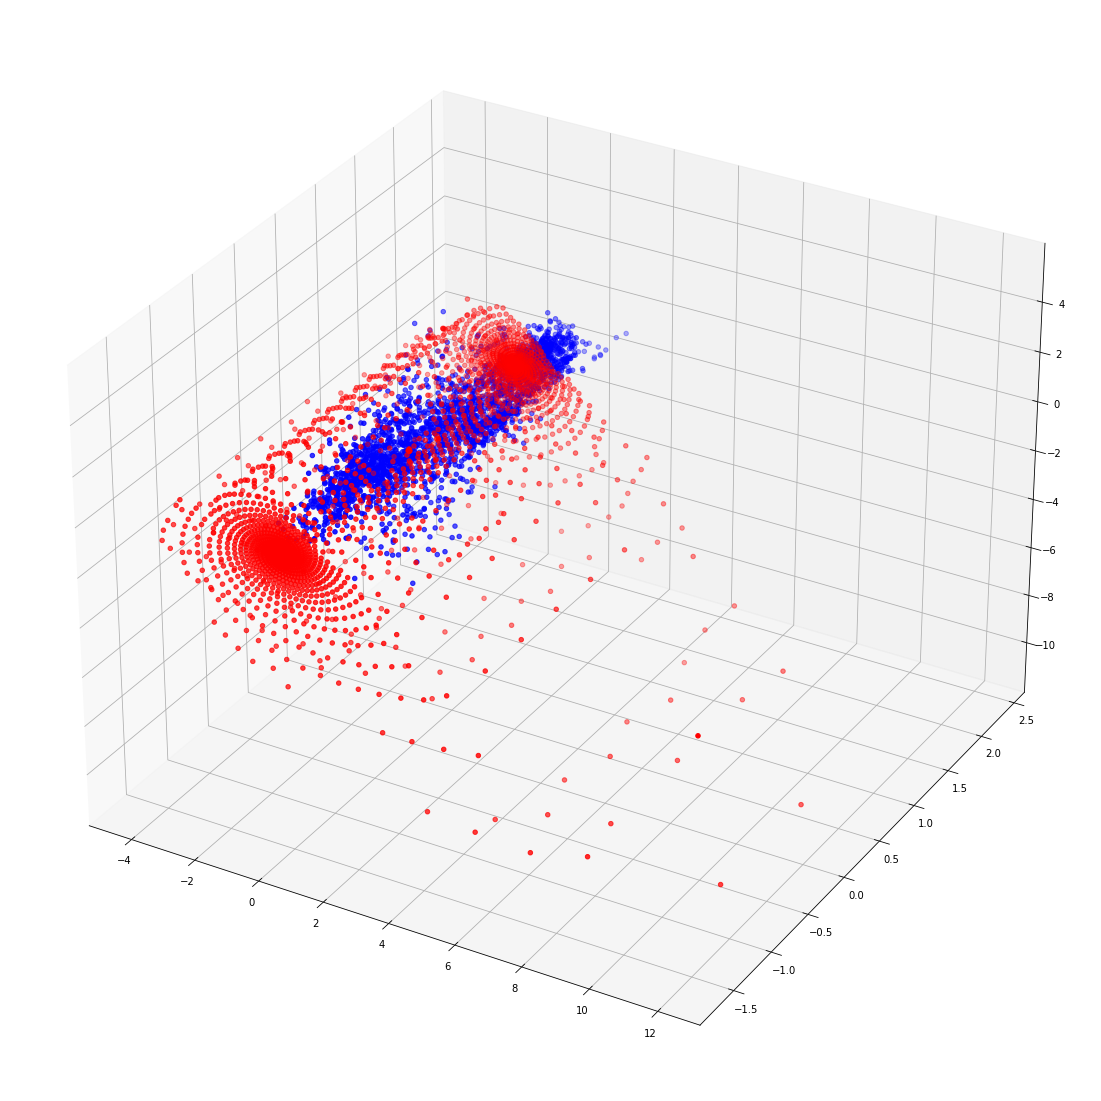

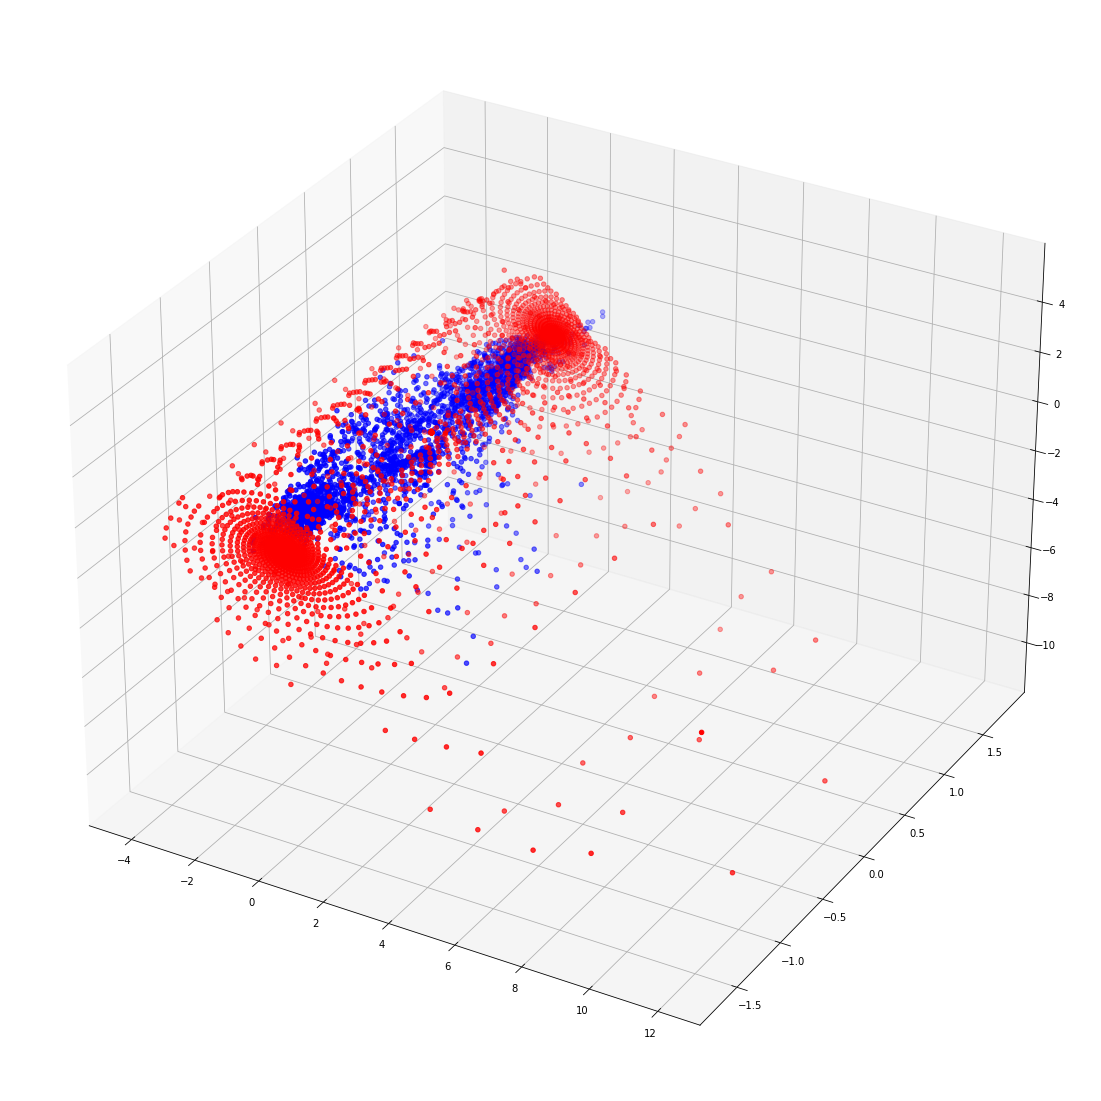

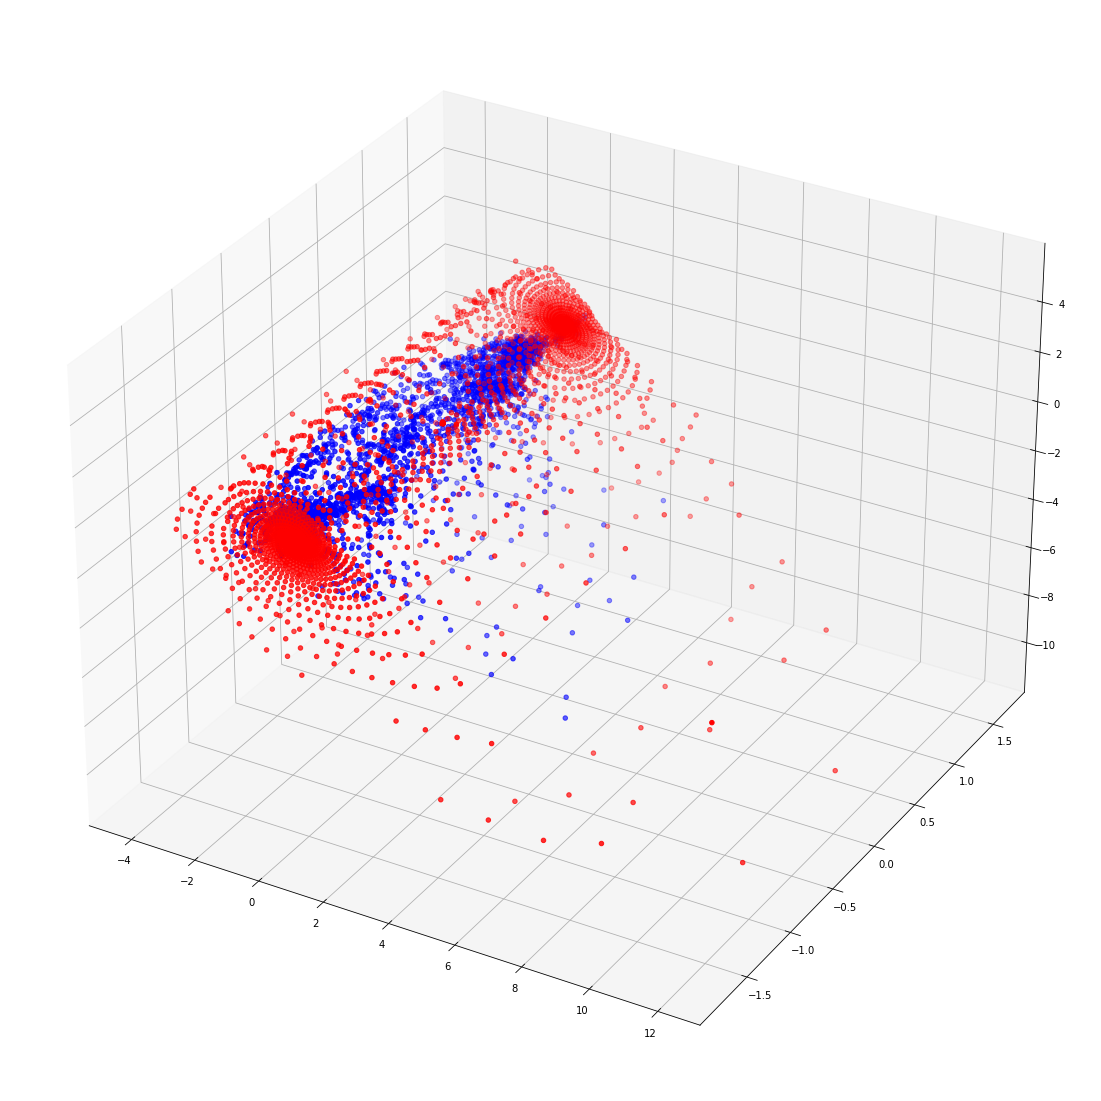

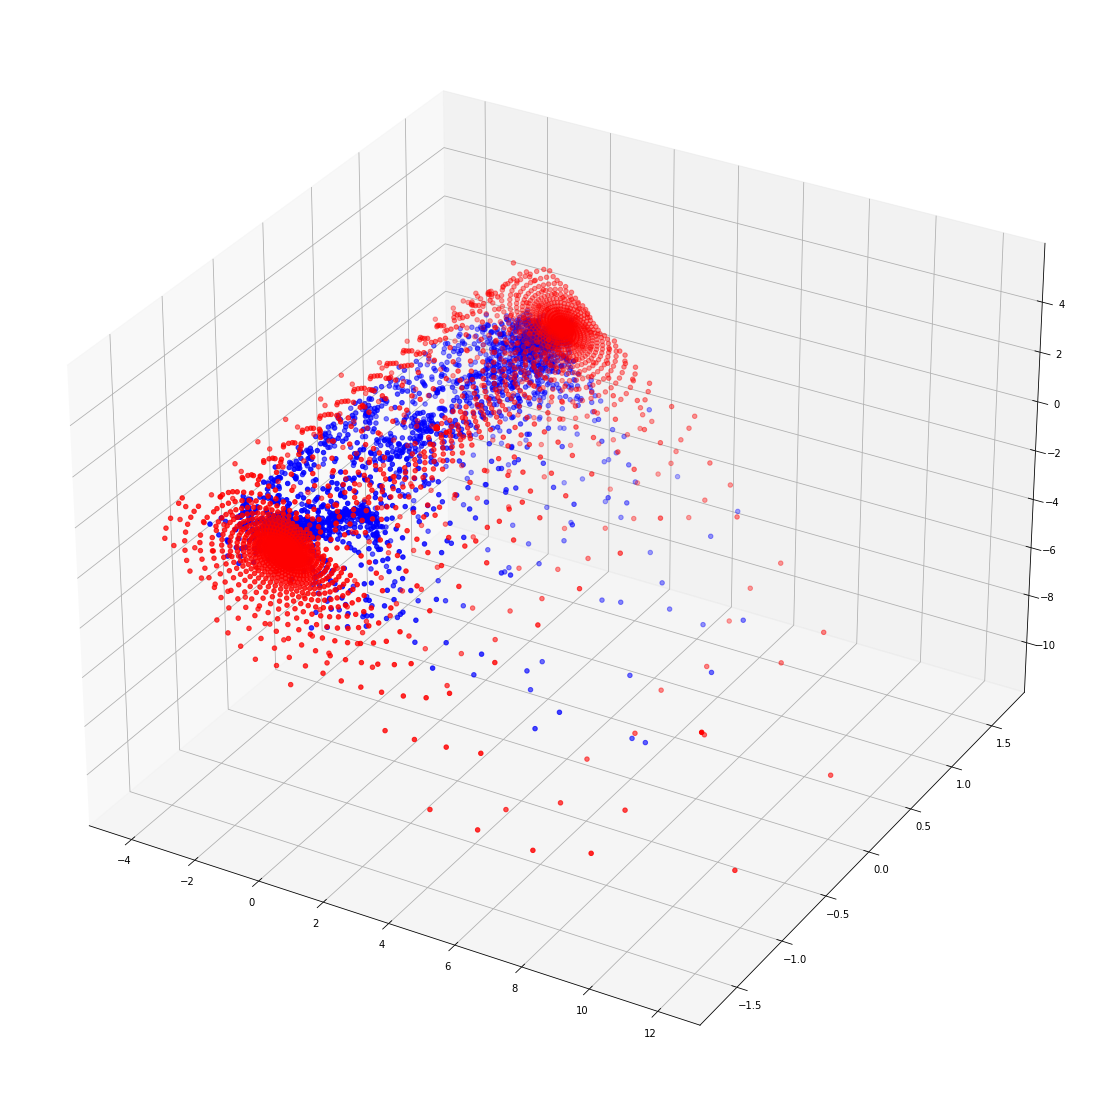

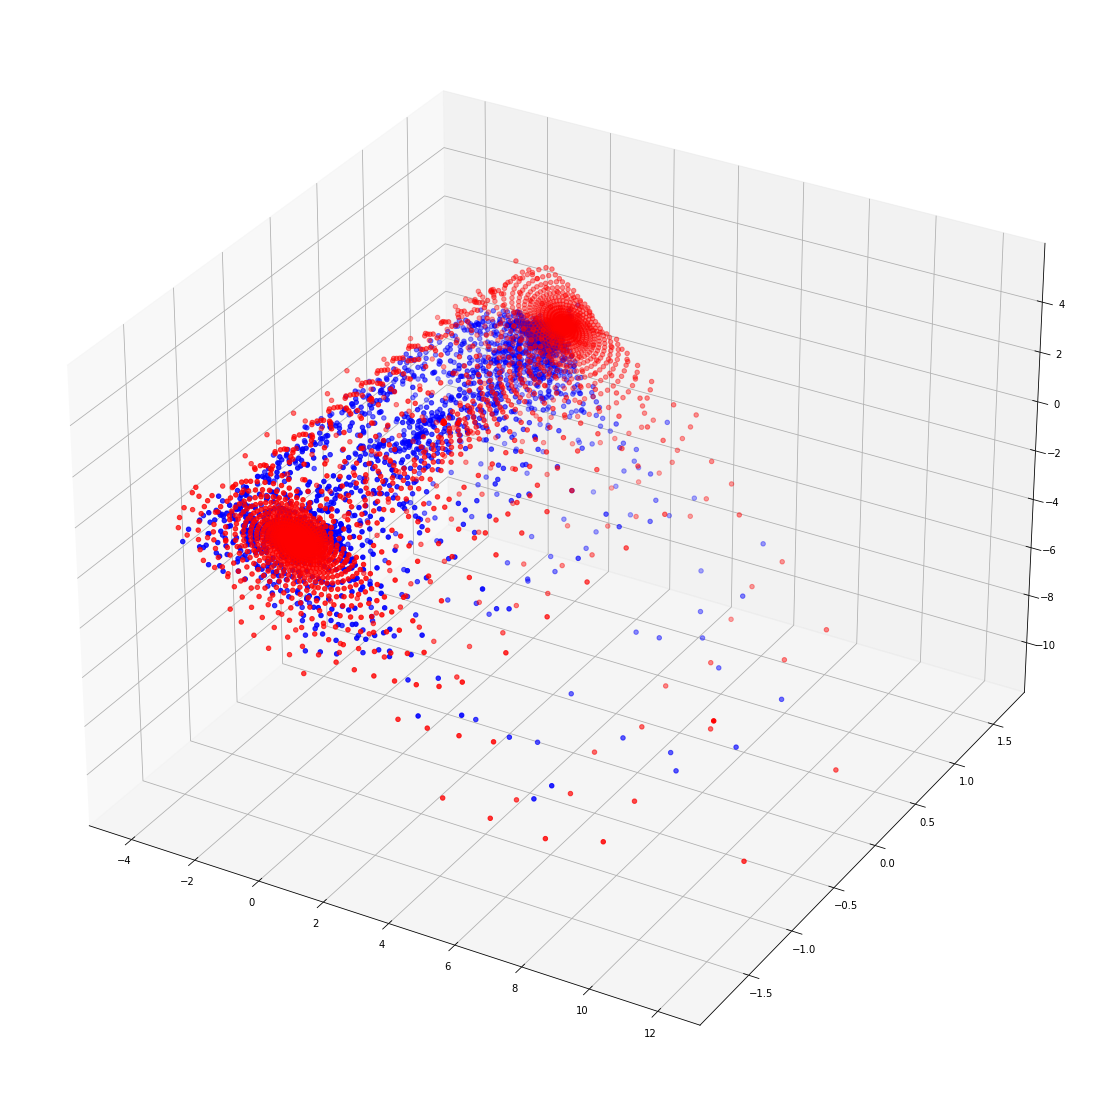

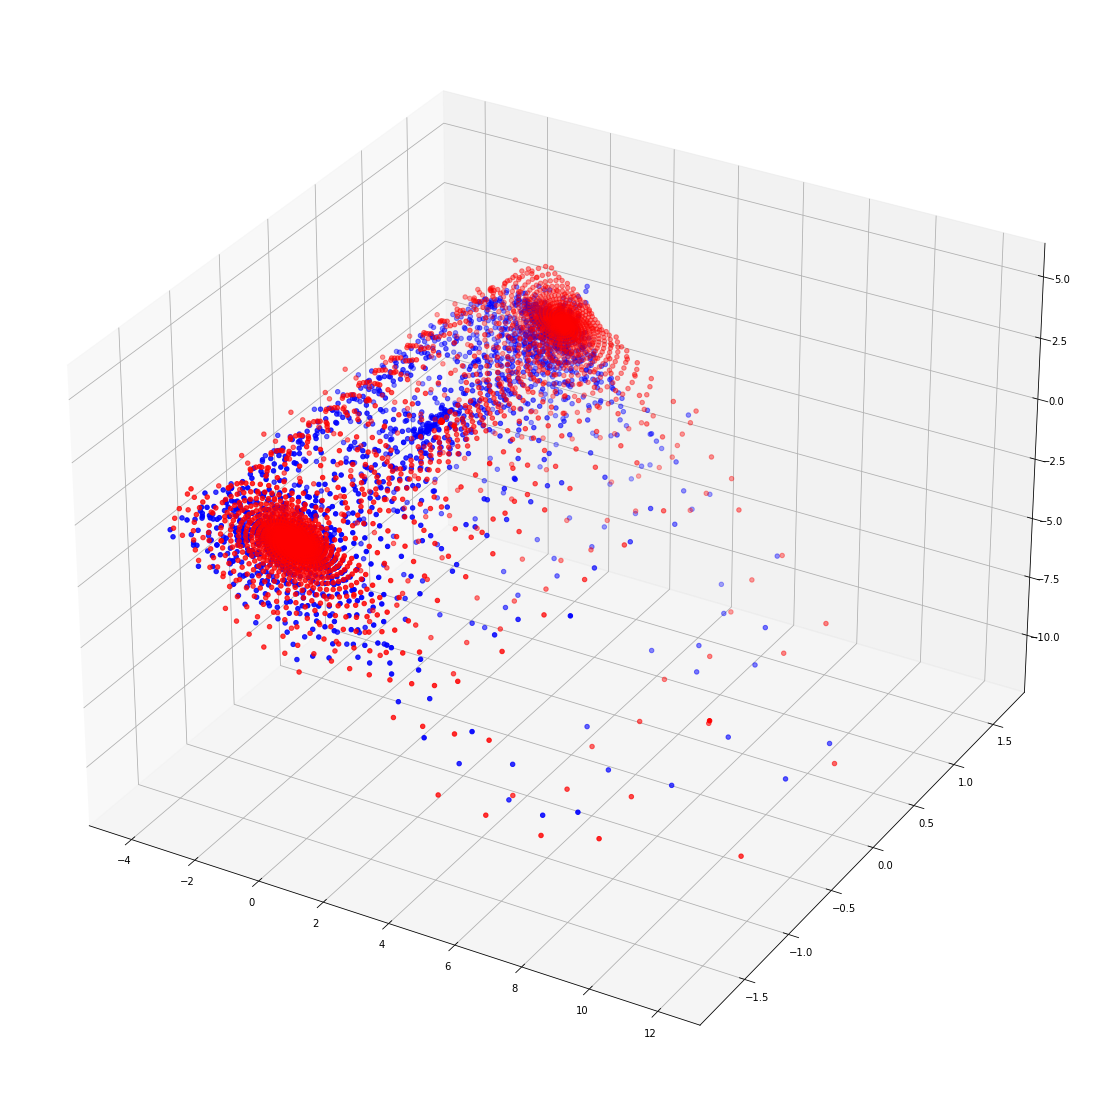

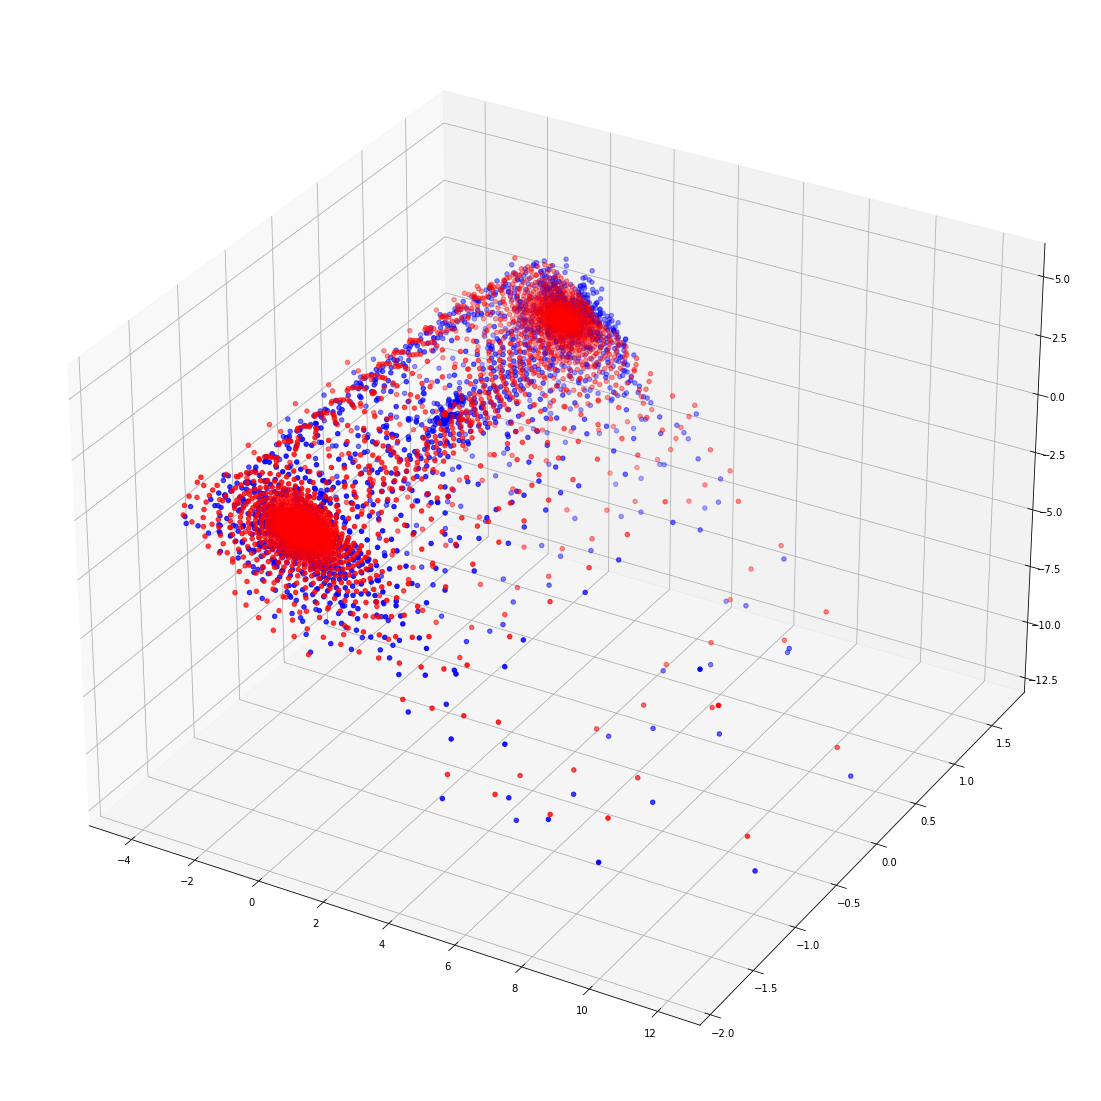

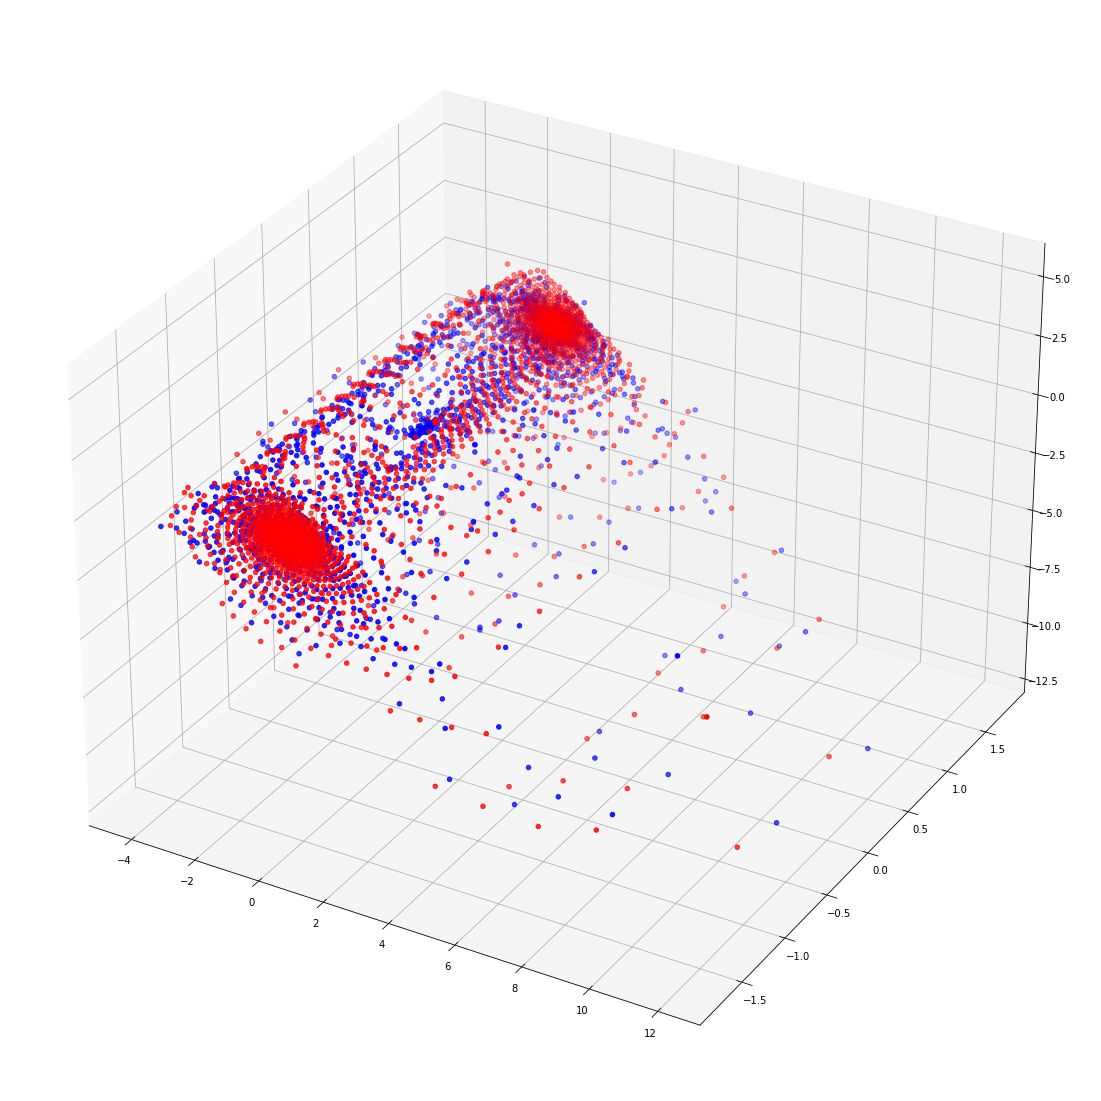

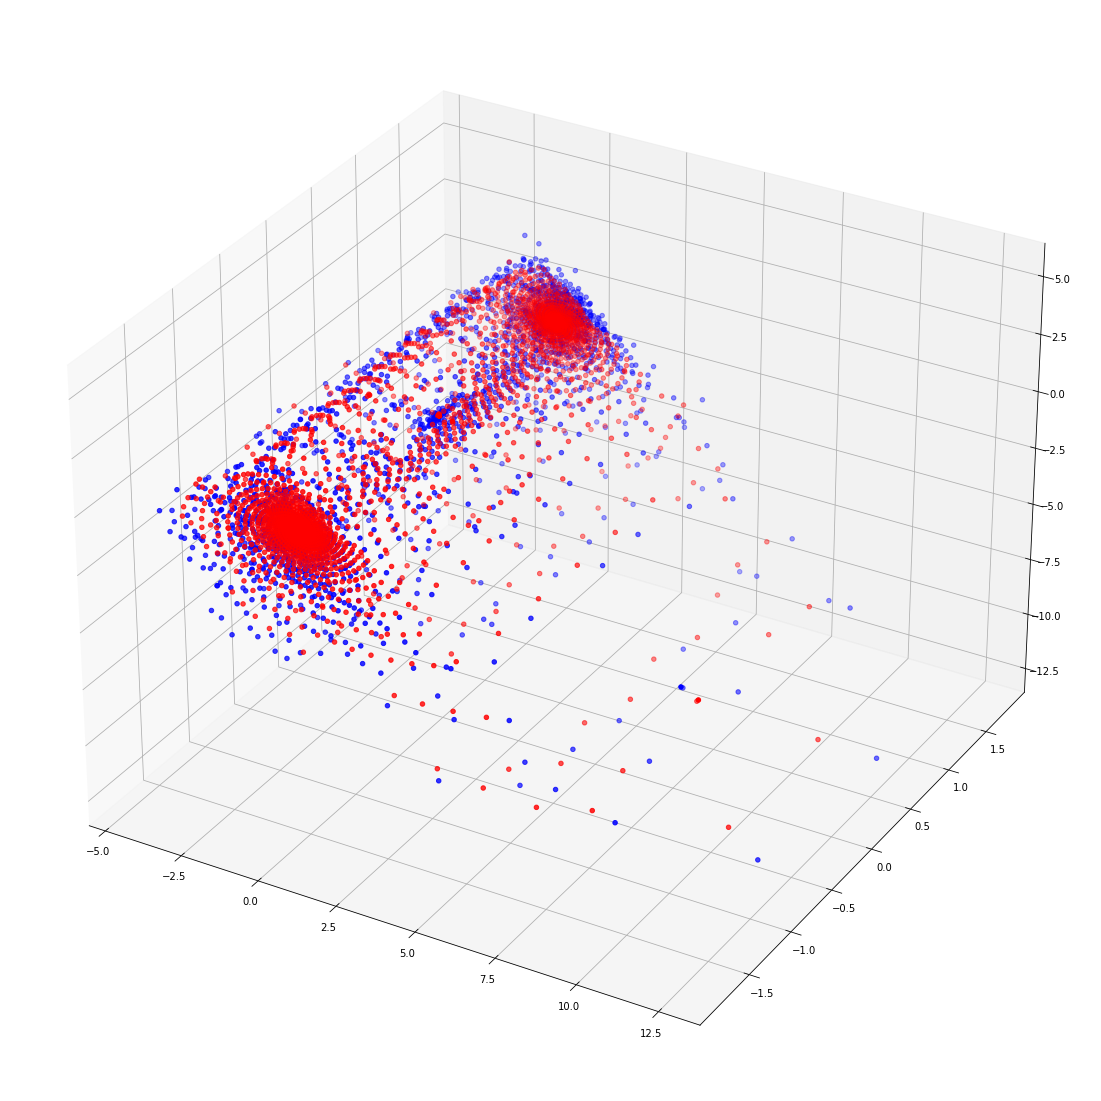

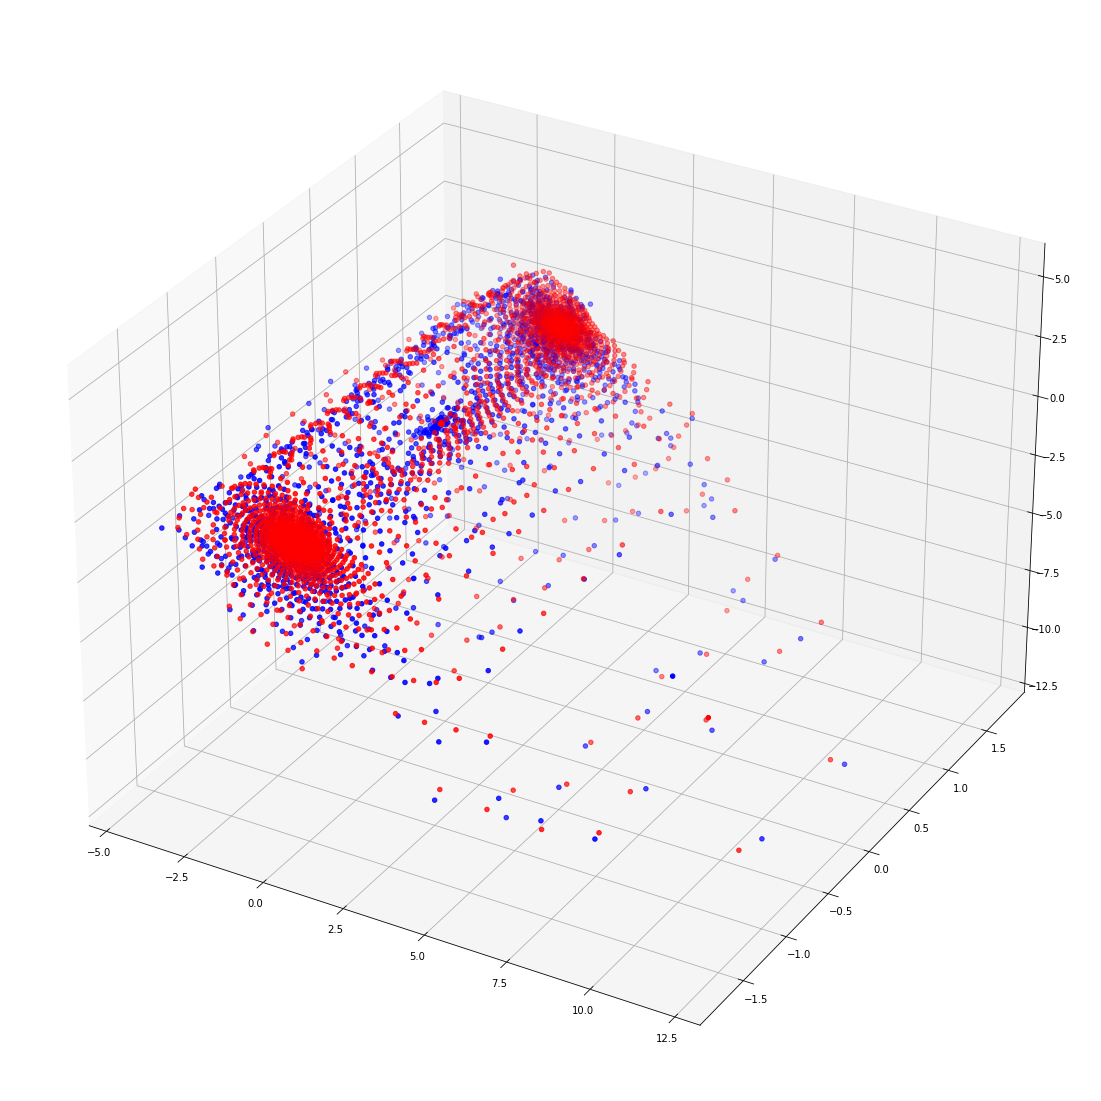

In [38]:
unet_model.fit(
    x=images_low, y=labels_low, epochs=1000, verbose=1, callbacks=[visualise_training])
# callbacks=None,
#     validation_split=0.0, validation_data=None, shuffle=True, class_weight=None,
#     sample_weight=None, initial_epoch=0, steps_per_epoch=None,
#     validation_steps=None, validation_batch_size=None, validation_freq=1,
#     max_queue_size=10, workers=1, use_multiprocessing=False
# )

In [62]:
pred_y = unet_model.predict(images_low)

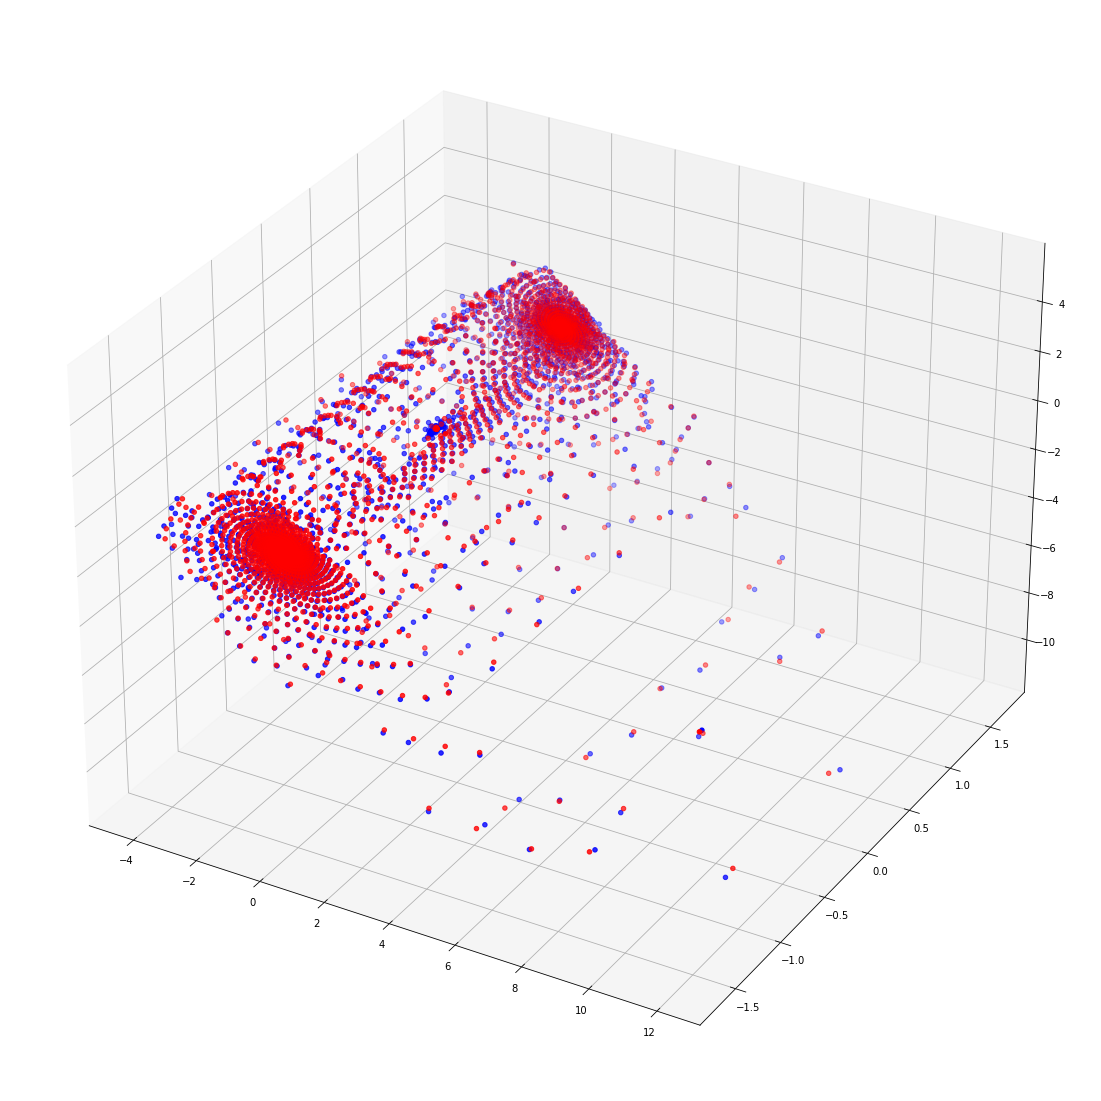

In [103]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

xyz = labels_low[0,:,:,:].reshape(-1, labels_low[0,:,:,:].shape[-1])[::20]
ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c='r', marker='o')

xyz = pred_y[0,:,:,:].reshape(-1, pred_y[0,:,:,:].shape[-1])[::20]
ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c='b', marker='o')

In [92]:
plot = k3d.plot(name='points')
plt_points = k3d.points(positions=labels_low[2], point_size=0.2, color=0xff0000, alpha=0.5)
plot += plt_points
plt_points = k3d.points(positions=pred_y[2], point_size=0.2, color=0x0000ff, alpha=0.5)
plot += plt_points
plt_points.shader='3d'
plot.display()

Output()

In [93]:
plot.fetch_screenshot()

In [94]:
with open('screenshot.png', 'wb') as f:
#     try:
#         out = plot.screenshot.decode('base64')
#     except: # Python 3
    from base64 import b64decode
    out = b64decode(plot.screenshot)    
    f.write(out)
    
Image(url='screenshot.png')

In [82]:
plot.screenshot

''

In [75]:
image_dir = plot.screenshot
img = mpimg.imread(image_dir)
plt.imshow(img)

AttributeError: 'str' object has no attribute 'read'

TypeError: Image data of dtype <U1 cannot be converted to float

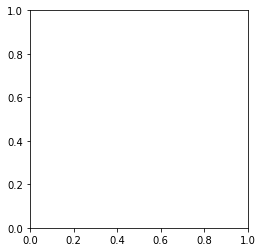

In [69]:
plt.imshow(plot.screenshot)